#pytorch workflow

In [98]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu121'

## data preparing and loading

In [99]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### splitting data into training and test sets

In [100]:
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### visualize

In [101]:
def plot_predictions(train_data = x_train,
                     train_labels= y_train,
                     test_data = x_test,
                     test_labels=y_test,
                     predictions=None) :

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size" : 14});


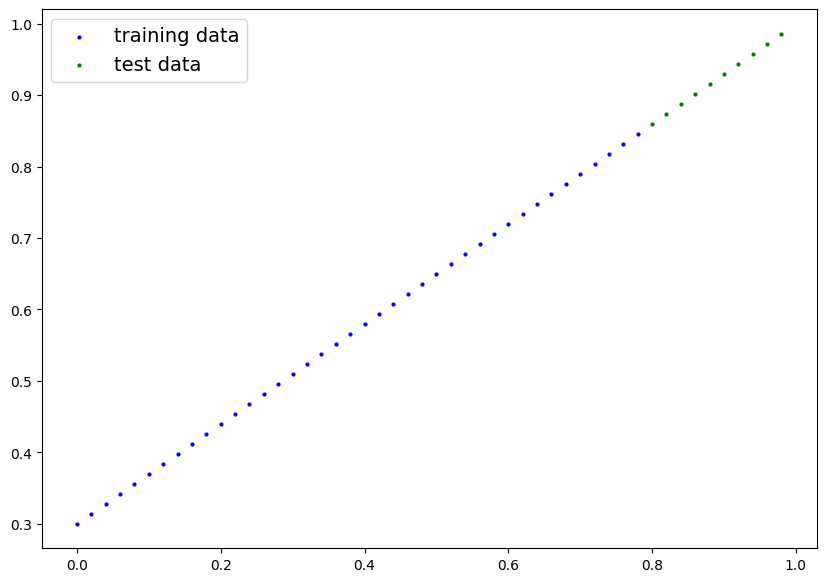

In [102]:
plot_predictions()

## build model

In [103]:
class linearRegressionModel(nn.Module) :
  def __init__(self) :
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                       requires_grad = True,
                                       dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [104]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### pytorch model buulding essentials

In [105]:
# torch.manual_seed(42)

model_0 = linearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.1288], requires_grad=True),
 Parameter containing:
 tensor([0.2345], requires_grad=True)]

In [106]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.2345]))])

In [107]:
weight, bias

(0.7, 0.3)

### making prediction using torch.inference_mode()

In [108]:
with torch.inference_mode():
  y_preds = model_0(x_test)

with torch.no_grad() :
  y_preds = model_0(x_test)

y_preds, y_test

(tensor([[0.3375],
         [0.3401],
         [0.3427],
         [0.3452],
         [0.3478],
         [0.3504],
         [0.3530],
         [0.3555],
         [0.3581],
         [0.3607]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

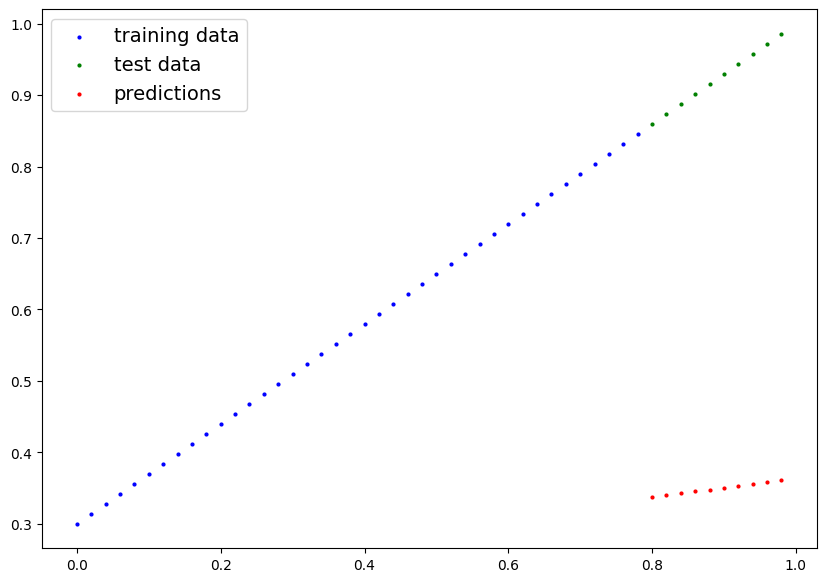

In [109]:
plot_predictions(predictions=y_preds)

## train model

In [110]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.1288])), ('bias', tensor([0.2345]))])

In [111]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)

In [112]:

loss_fn

L1Loss()

In [113]:
# torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs) :
  model_0.train()

  y_pred = model_0(x_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  print(f"loss : {loss}")

  model_0.eval()
  with torch.inference_mode() :
    test_pred = model_0(x_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch : {epoch} test loss : {test_loss}")
    print(model_0.state_dict())

loss : 0.288301944732666
epoch : 0 test loss : 0.5604262351989746
OrderedDict([('weights', tensor([0.1327])), ('bias', tensor([0.2445]))])
loss : 0.27678096294403076
loss : 0.2652599513530731
loss : 0.25373896956443787
loss : 0.24221797287464142
loss : 0.23069699108600616
loss : 0.2191760092973709
loss : 0.20787811279296875
loss : 0.19749024510383606
loss : 0.1879529505968094
loss : 0.1792302429676056
epoch : 10 test loss : 0.43027859926223755
OrderedDict([('weights', tensor([0.1716])), ('bias', tensor([0.3400]))])
loss : 0.17092058062553406
loss : 0.163346067070961
loss : 0.15644659101963043
loss : 0.15016160905361176
loss : 0.14457502961158752
loss : 0.13919438421726227
loss : 0.13430927693843842
loss : 0.13003113865852356
loss : 0.12588608264923096
loss : 0.12219583988189697
epoch : 20 test loss : 0.3354092538356781
OrderedDict([('weights', tensor([0.2080])), ('bias', tensor([0.4025]))])
loss : 0.11870880424976349
loss : 0.11556152999401093
loss : 0.11264920234680176
loss : 0.109999

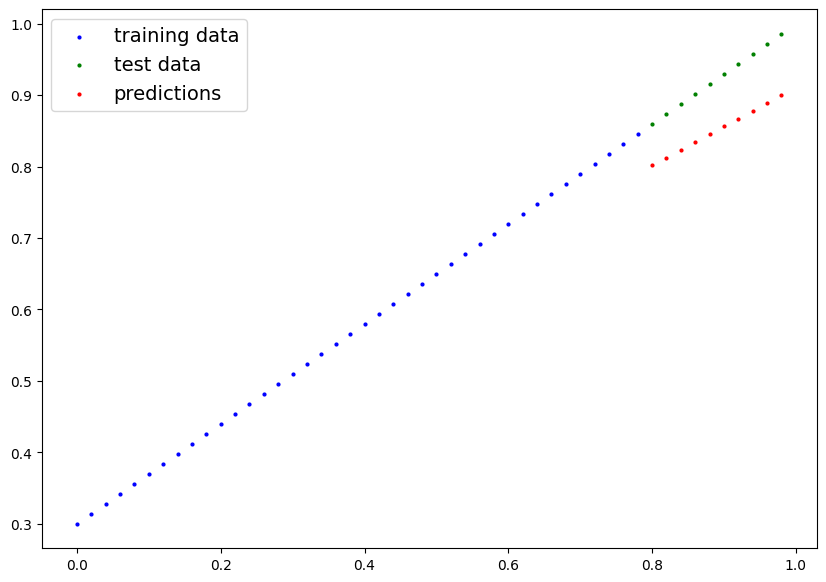

In [114]:
with torch.no_grad() :
  y_preds_new = model_0(x_test)

plot_predictions(predictions=y_preds_new)

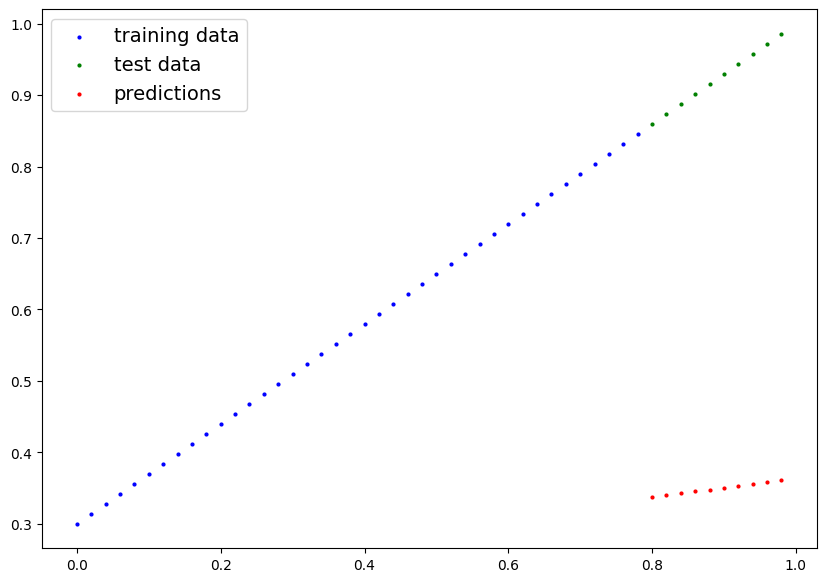

In [115]:

plot_predictions(predictions=y_preds)

In [116]:
loss_values, test_loss_values

([tensor(0.2883, grad_fn=<MeanBackward0>),
  tensor(0.1792, grad_fn=<MeanBackward0>),
  tensor(0.1222, grad_fn=<MeanBackward0>),
  tensor(0.0984, grad_fn=<MeanBackward0>),
  tensor(0.0885, grad_fn=<MeanBackward0>),
  tensor(0.0830, grad_fn=<MeanBackward0>),
  tensor(0.0791, grad_fn=<MeanBackward0>),
  tensor(0.0756, grad_fn=<MeanBackward0>),
  tensor(0.0721, grad_fn=<MeanBackward0>),
  tensor(0.0686, grad_fn=<MeanBackward0>),
  tensor(0.0652, grad_fn=<MeanBackward0>),
  tensor(0.0617, grad_fn=<MeanBackward0>),
  tensor(0.0583, grad_fn=<MeanBackward0>),
  tensor(0.0549, grad_fn=<MeanBackward0>),
  tensor(0.0514, grad_fn=<MeanBackward0>),
  tensor(0.0480, grad_fn=<MeanBackward0>),
  tensor(0.0446, grad_fn=<MeanBackward0>),
  tensor(0.0411, grad_fn=<MeanBackward0>),
  tensor(0.0377, grad_fn=<MeanBackward0>),
  tensor(0.0343, grad_fn=<MeanBackward0>)],
 [tensor(0.5604),
  tensor(0.4303),
  tensor(0.3354),
  tensor(0.2727),
  tensor(0.2339),
  tensor(0.2087),
  tensor(0.1923),
  tensor(0.18

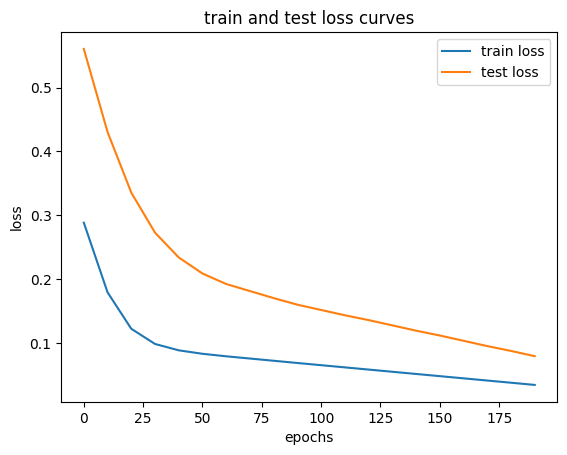

In [117]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy())

plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("train and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()